# Notebook for exploration of the mean EEL field

*This has been done at early stage in my transition from Matlab to Python mostly base on Python Dataframe. The use of [Xarray](http://xarray.pydata.org/en/stable/) would have definitely shortened and optimised this code.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.precision", 4)

## 1. Load data into Dataframe

In [2]:
pathdir = '../data/raw/csv_ctdgrid/'

# List available data files
import glob
listfiles= glob.glob(pathdir+'/'+'*.csv');
print(*listfiles, sep = "\n")


../data/raw/csv_ctdgrid/EELCTDandLADCP_refpos.csv
../data/raw/csv_ctdgrid/EEL_LADCP_3Dfield.csv
../data/raw/csv_ctdgrid/EELCTDandLADCP_refdate.csv
../data/raw/csv_ctdgrid/EELCTDandLADCP_2Dfield.csv
../data/raw/csv_ctdgrid/EELCTDandLADCP_3Dfield.csv


#### 1.1 Import 3D Fields

In [3]:
file1 = pathdir+'/'+'EELCTDandLADCP_3Dfield.csv'
df3D = pd.read_csv(file1,sep=',', index_col=None, 
                     header=0)
df3D.info()

df3D.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57870 entries, 0 to 57869
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CruiseID     57870 non-null  object 
 1   Staname      57870 non-null  object 
 2   Refdist      57870 non-null  float64
 3   Depth        57870 non-null  int64  
 4   PTMP         57870 non-null  float64
 5   PSAL         57870 non-null  float64
 6   Sigma0       57870 non-null  float64
 7   Vrel         57870 non-null  float64
 8   Vladcp       57870 non-null  float64
 9   Vabs         57870 non-null  float64
 10  Vladcpalong  57870 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 4.9+ MB


,Refdist,Depth,PTMP,PSAL,Sigma0,Vrel,Vladcp,Vabs,Vladcpalong
count,57870.0000,57870.0000,57870.0000,57870.0000,57870.0000,5.7870e+04,57870.0000,57870.0000,57870.0000
mean,582.8649,849.6867,6.8731,35.1476,27.5162,5.4138e-03,0.0076,0.0051,0.0053
std,339.4693,627.5724,2.5374,0.1724,0.2279,4.5642e-02,0.1166,0.1018,0.1018
min,13.4420,5.0000,2.3099,34.3866,26.1073,-1.7773e-01,-0.5191,-0.4203,-0.7869
25%,298.9966,325.0000,4.1923,34.9749,27.3393,-1.2466e-02,-0.0588,-0.0530,-0.0502
50%,493.3397,715.0000,7.3385,35.1481,27.4986,3.4205e-05,0.0043,0.0021,0.0037
75%,944.8161,1285.0000,9.1082,35.2966,27.7298,1.9698e-02,0.0708,0.0617,0.0534
max,1242.9285,2685.0000,14.2435,35.5507,27.9332,4.4305e-01,0.5532,0.5574,0.5681


\
### Visual check of data quality

Data Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86c0ead8e0>,
      dtype=object)

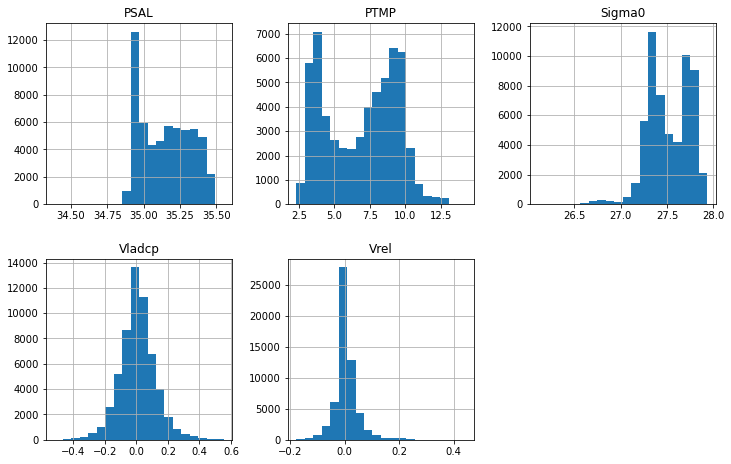

In [4]:
# Define variable of interest 
VOI=['PTMP','PSAL','Sigma0','Vladcp','Vrel']

# Plot data distribution for quick check 
df3D[VOI].hist(bins=20, figsize=(12,12), layout=(3, 3))

\
#### Relationship between Temperature and salinity data

In [5]:
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10, 10]})


Matplotlib is building the font cache using fc-list. This may take a moment.


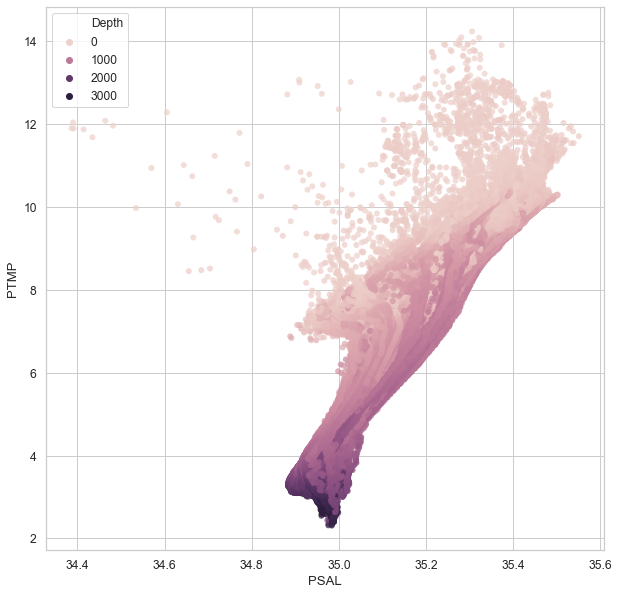

In [6]:
plt.figure()
scatplot=sns.scatterplot(x=df3D['PSAL'], y=df3D['PTMP'],
                hue=df3D['Depth'],
                hue_norm=(0, 2500),legend="brief",
                linewidth=0, alpha = 0.7);
scatplot.legend(loc=2)

Different types of jointplot

<Figure size 720x720 with 0 Axes>

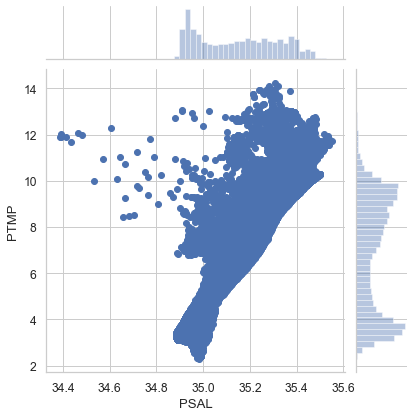

In [7]:
plt.figure(figsize=(10, 10) )
g1=sns.jointplot(x=df3D['PSAL'], y=df3D['PTMP'])


<Figure size 720x720 with 0 Axes>

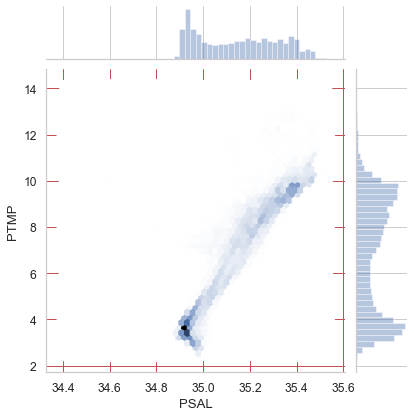

In [8]:
# Hex type
plt.figure(figsize=(10, 10) )
g2=sns.jointplot(x=df3D['PSAL'], y=df3D['PTMP'],kind='hex')
g2.ax_joint.grid(color='r', linestyle='-', linewidth=1)

#dir(g2.ax_joint.grid)

<Figure size 720x720 with 0 Axes>

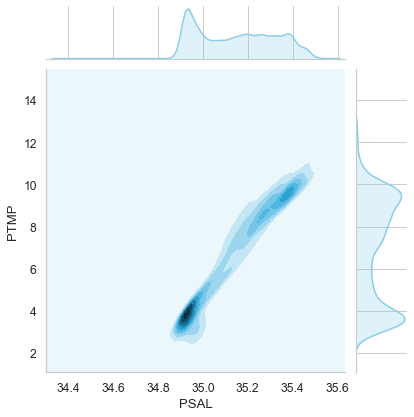

In [9]:
# KDE type
plt.figure(figsize=(10, 10) )
g3=sns.jointplot(x=df3D['PSAL'], y=df3D['PTMP'],kind='kde', color="skyblue")
#g3.ax_joint.grid(color='r', linestyle='-', linewidth=2) # dosn't work, grid axes is hidden below colormap


In [10]:
#g3.ax_joint.grid.__getattribute__
#help(g3.ax_joint.grid)

\
#### Relationship between LADCP velocity and Relative geostrophic velocity data

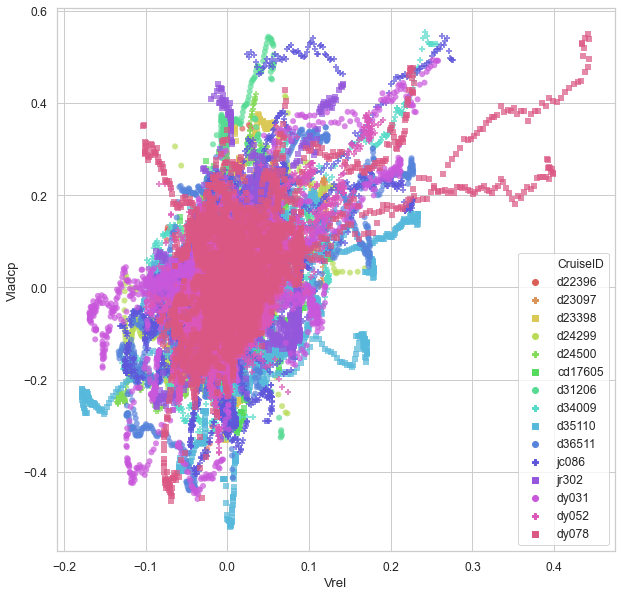

In [11]:
# Define marker of interest
markerstyle = ['o','P','s']

# Create list of marker associated with each unique cruiseID
cruiselist = list(df3D['CruiseID'].unique())
markerlist = [markerstyle[c%len(markerstyle)] for c,values in enumerate(cruiselist,0) ]

# Create markers dictionary that is going to be called in scatterplot
markers = dict(zip(cruiselist, markerlist))

plt.figure()
scatplot=sns.scatterplot(x=df3D['Vrel'], y=df3D['Vladcp'],
                         hue=df3D['CruiseID'],
                         palette='hls',
                         style=df3D['CruiseID'],
                         markers=markers,
                         linewidth=0, 
                         alpha = 0.7);

<Figure size 720x720 with 0 Axes>

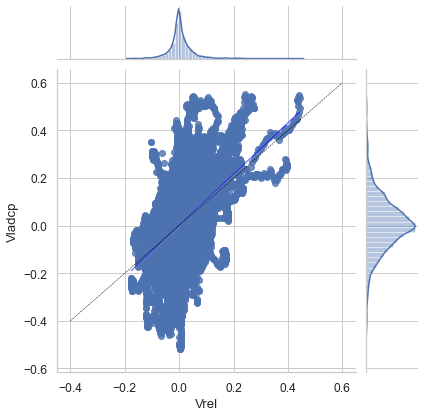

In [12]:
plt.figure(figsize=(10, 10) )
jp=sns.jointplot(x=df3D['Vrel'], y=df3D['Vladcp'],kind='reg',
                joint_kws={'line_kws':{'color':'blue','linewidth':0.5}})

# Plot reference line (Vel_adcp = Relative geostrophic velocity)
jp.ax_joint.plot(np.arange(-0.4,0.61,0.2), np.arange(-0.4,0.61,0.2),
                color="black", linestyle='dashed',linewidth=0.5)



Identify the station corresponding to the suspect data record on dy078 (geostrophic velocity> 0.4 m/s):

In [13]:
print(df3D[df3D['Vrel']>0.4]['Staname'].unique())

['IB10']


The outliers in geostrophic velocity at IB9 during the DY078 cruise suggest that the level of no motion approximation doesn't held everywhere and all the time...


**More diagnostic on the differences between relative geostrophic velocities and LADCP are done in Notebook 03.**





#### 1.2 Import 2D Fields 

Depth of level of no motion, depth of specific isopycnals, etc.

In [14]:
file2d = pathdir+'/'+'EELCTDandLADCP_2Dfield.csv'
df2D = pd.read_csv(file2d,sep=',', index_col=None, 
                     header=0)
df2D[['Refdist','ZLoNM']] = df2D[['Refdist','ZLoNM']].round(decimals=0)
print(df2D)

     CruiseID Staname  Refdist      Lon      Lat  ZLoNM
0      d22396      1G   1308.0      NaN      NaN    NaN
1      d22396      2G   1298.0      NaN      NaN    NaN
2      d22396      3G   1292.0      NaN      NaN    NaN
3      d22396      4G   1287.0      NaN      NaN    NaN
4      d22396      5G   1277.0      NaN      NaN    NaN
...       ...     ...      ...      ...      ...    ...
1168    dy078   IB19S     84.0      NaN      NaN  725.0
1169    dy078   IB20S     56.0 -19.5510  62.9170  595.0
1170    dy078   IB21S     25.0 -19.9159  63.1328  595.0
1171    dy078   IB22S     13.0 -20.0660  63.2162  105.0
1172    dy078   IB23S      0.0 -20.2178  63.3178    NaN

[1173 rows x 6 columns]


#### 1.3 Import Metadata

In [15]:
# Date of each cruise
file3 = pathdir+'/'+'EELCTDandLADCP_refdate.csv'
dfdate = pd.read_csv(file3,sep=',', index_col=None, 
                     header=0)
print(dfdate)

   CruiseID  Year  Month
0    d22396  1996     10
1    d23097  1997      9
2    d23398  1998      5
3    d24299  1999      9
4    d24500  2000      2
5    d25301  2001     12
6   cd17605  2005     10
7    d31206  2006     10
8    d32107  2007      8
9    d34009  2009      6
10   d35110  2010      5
11   d36511  2011      5
12    jc086  2013      5
13    jr302  2014      7
14    dy031  2015      6
15    dy052  2016      6
16    dy078  2017      5


In [16]:
# Location of EEL stations
file3 = pathdir+'/'+'EELCTDandLADCP_refpos.csv'
dfloc = pd.read_csv(file3,sep=',', index_col=None, 
                     header=0)
dfloc['Refdist'] = dfloc['Refdist'].round(decimals=1)
dfloc

,Staname,Refdist,LonSta,LatSta,DepthSta
0,1G,1307.6,-6.133,56.667,190
1,2G,1298.2,-6.283,56.683,30
2,3G,1292.4,-6.367,56.708,70
3,4G,1286.6,-6.450,56.733,115
4,5G,1277.5,-6.600,56.733,80
...,...,...,...,...,...
64,IB19S,84.0,-19.668,62.667,1670
65,IB20S,55.6,-19.551,62.917,1400
66,IB21S,25.4,-19.916,63.133,1030
67,IB22S,13.4,-20.067,63.216,670


In [17]:
# Sorted according to distance:
dfs = dfloc.sort_values('Refdist', ascending=True)
print(dfs)

   Staname  Refdist  LonSta  LatSta  DepthSta
68   IB23S      0.0 -20.215  63.317       120
67   IB22S     13.4 -20.067  63.216       670
66   IB21S     25.4 -19.916  63.133      1030
65   IB20S     55.6 -19.551  62.917      1400
64   IB19S     84.0 -19.668  62.667      1670
..     ...      ...     ...     ...       ...
4       5G   1277.5  -6.600  56.733        80
3       4G   1286.6  -6.450  56.733       115
2       3G   1292.4  -6.367  56.708        70
1       2G   1298.2  -6.283  56.683        30
0       1G   1307.6  -6.133  56.667       190

[69 rows x 5 columns]


<br><br>
## 2. Create Pivot Tables

#### 2.1 For 3D variables

In [18]:
df3D.groupby(['Staname','Depth'])["Vabs"].mean()

Staname  Depth
10G      15       0.0317
         25       0.0291
         35       0.0291
         45       0.0035
         55       0.0437
                   ...  
T        75      -0.0042
         85      -0.0182
         95      -0.0464
         105     -0.0498
         115      0.0170
Name: Vabs, Length: 5988, dtype: float64

In [19]:
df_MVabs = df3D.pivot_table(values="Vabs", index="Depth", columns="Staname")
print(df_MVabs.head())

Staname     10G     13G     14G     15G      8G      9G       A       B  \
Depth                                                                     
5           NaN     NaN     NaN     NaN     NaN     NaN  0.0022  0.0202   
15       0.0317  0.0623 -0.0403 -0.0617  0.0285  0.0503 -0.0051 -0.0037   
25       0.0291  0.0592  0.0069  0.0078  0.0279  0.0536 -0.0363  0.0126   
35       0.0291  0.0529  0.0066  0.0082  0.0270  0.0558 -0.0368  0.0112   
45       0.0035  0.0452  0.0069  0.0072  0.0254  0.0295 -0.0388  0.0033   

Staname       C       D  ...       L       M       N       O       P       Q  \
Depth                    ...                                                   
5        0.1151     NaN  ...     NaN     NaN     NaN     NaN     NaN  0.0470   
15      -0.0014 -0.0766  ... -0.0695 -0.0302  0.0532  0.0550  0.0477  0.1217   
25       0.0331 -0.0685  ... -0.0697 -0.0369  0.0606  0.0543  0.0267  0.1291   
35       0.0324 -0.0696  ... -0.0694 -0.0370  0.0600  0.0491  0.0263  0.12

#### 2.2 For 2D variable (e.g. depth of the level of no motion)

In [20]:
# Create pivot table to calculate the mean level of no motion. Transpose the dataframe for plotting purposes
df_MLoNM = df2D.pivot_table(values="ZLoNM", columns="Staname").T
print(df_MLoNM)

            ZLoNM
Staname          
10G       51.2500
11G       45.0000
12G       45.0000
13G      110.0000
14G      110.0000
...           ...
Q        295.0000
Q1       470.2941
R        120.0000
S        111.1538
T        109.6154

[68 rows x 1 columns]


In [21]:
# Merge the dataframe with the dataframe containing the reference distance dfs
df_MLoNMnew=pd.merge(dfs,
                    df_MLoNM,
                    how='left',
                    on='Staname')

print(df_MLoNMnew)

   Staname  Refdist  LonSta  LatSta  DepthSta     ZLoNM
0    IB23S      0.0 -20.215  63.317       120       NaN
1    IB22S     13.4 -20.067  63.216       670  111.0000
2    IB21S     25.4 -19.916  63.133      1030  511.3636
3    IB20S     55.6 -19.551  62.917      1400  579.5455
4    IB19S     84.0 -19.668  62.667      1670  715.0000
..     ...      ...     ...     ...       ...       ...
64      5G   1277.5  -6.600  56.733        80   26.4286
65      4G   1286.6  -6.450  56.733       115   64.0000
66      3G   1292.4  -6.367  56.708        70   61.6667
67      2G   1298.2  -6.283  56.683        30   15.0000
68      1G   1307.6  -6.133  56.667       190   15.0000

[69 rows x 6 columns]


##### Note: The rows of the new dataframe are sorted according to the reference dataframe, so no further sorting is needed for the 2D variables

<Figure size 720x720 with 0 Axes>

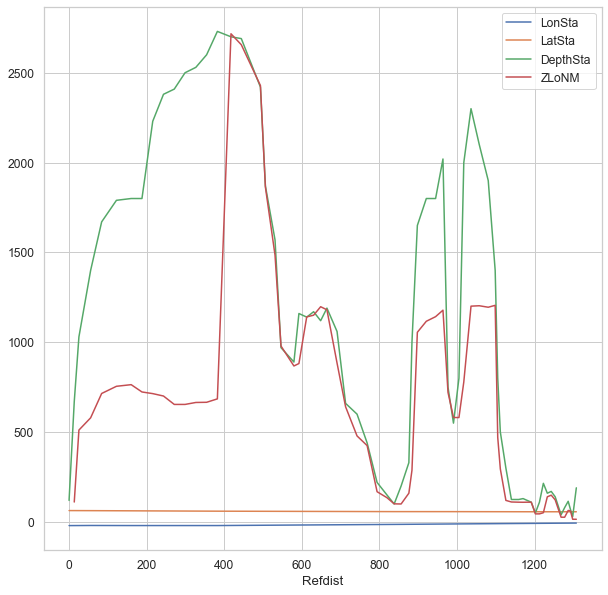

In [22]:
# PLot
plt.figure()
df_MLoNMnew.plot(x='Refdist')

#### Plot Level of no motion for each cruise

Create dataframe of the depth of LoNM as a function of cruise and distance along the section

In [23]:
dftemp = df2D.pivot(index='CruiseID', 
                           columns='Refdist',
                           values='ZLoNM')
dftemp

Refdist,0.0,13.0,25.0,56.0,84.0,122.0,160.0,188.0,216.0,243.0,...,1223.0,1233.0,1243.0,1253.0,1268.0,1277.0,1287.0,1292.0,1298.0,1308.0
CruiseID,,,,,,,,,,,,,,,,,,,,,
cd17605,NaN,115.0,125.0,595.0,765.0,775.0,755.0,755.0,785.0,775.0,...,45.0,45.0,155.0,135.0,15.0,15.0,65.0,65.0,NaN,NaN
d22396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d23097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d23398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,755.0,755.0,755.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d24299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d24500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.0,155.0,135.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN
d25301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,725.0,815.0,835.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d31206,NaN,115.0,535.0,645.0,825.0,805.0,785.0,775.0,765.0,765.0,...,45.0,145.0,145.0,135.0,35.0,35.0,65.0,65.0,15.0,15.0
d32107,NaN,105.0,575.0,595.0,775.0,855.0,855.0,795.0,715.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN


#### Get the corresponding cruise year by merging with metadataframe dfdate

<Figure size 864x720 with 0 Axes>

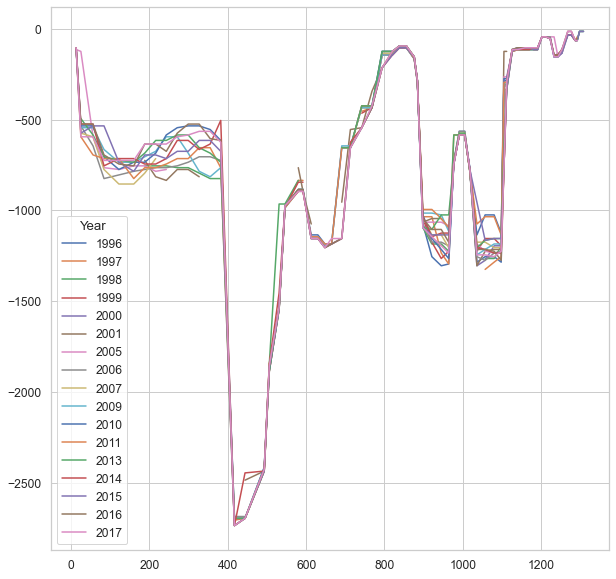

In [24]:
dfLoNMbycruise=pd.merge(dfdate[['CruiseID','Year']],
                    dftemp,
                    how='left',
                    on='CruiseID')

dfLoNMbycruise = dfLoNMbycruise.drop(columns='CruiseID')
dfLoNMbycruise = - dfLoNMbycruise.set_index('Year',drop=True)

dfLoNMbycruiseT = dfLoNMbycruise.T

plt.figure(figsize=(12,10))
dfLoNMbycruiseT.plot()

<br><br>  
## 3. Sort the dataframe columns according to additional metadata (e.g. distance of reference along the section)
##### To reorganise the columns of the pivot table according to the distance of the station on the EEL section, we use the dataframe *dfs*, dfloc sorted on the reference distance 'Refdist'

We defined *list1* as the list of column names (= station names). This list will be used to sort the columns of the dataframes according to the distance of the stations along the EEL section. These reference distances are defined in the file containing the cruises metadata *EELCTDandLADCP_refpos_gvel.csv* which has been loaded earlier in the dataframe *dfs*. The (sorted) column names of the dataframe *dfs* are stored in another list, *list2*.

In [25]:
list1 = list(df_MVabs.columns) 
print(len(list1))

59


<br> List of the reference station from the metadata dataframe dfloc (sorted by distance):

In [26]:
list2 = list(zip(list(dfs.Staname),list(dfs.Refdist)))
print((list2))
print(f"\nLength: {len(list2)}")

[('IB23S', 0.0), ('IB22S', 13.4), ('IB21S', 25.4), ('IB20S', 55.6), ('IB19S', 84.0), ('IB18S', 122.1), ('IB17', 160.1), ('IB16A', 187.9), ('IB16', 215.7), ('IB15', 243.4), ('IB14', 271.2), ('IB13A', 299.0), ('IB13', 326.8), ('IB12A', 354.6), ('IB12', 382.3), ('IB11A', 417.4), ('IB11', 444.0), ('IB10', 493.3), ('IB9', 506.1), ('IB8', 530.9), ('IB7', 546.3), ('IB6', 579.6), ('IB5', 592.5), ('IB4C', 612.6), ('IB4B', 630.4), ('IB4A', 648.5), ('IB4', 664.7), ('IB3A', 690.8), ('IB3', 712.8), ('IB2A', 742.3), ('IB2', 768.3), ('IB1A', 794.0), ('IB1', 819.5), ('A', 838.0), ('B', 855.9), ('C', 875.9), ('D', 883.9), ('E', 897.8), ('F', 920.9), ('G', 944.8), ('H', 963.8), ('I', 976.8), ('J', 990.9), ('K', 1005.0), ('L', 1017.5), ('M', 1036.1), ('N', 1057.4), ('O', 1080.5), ('P', 1098.4), ('Q1', 1105.0), ('Q', 1111.7), ('R', 1126.0), ('S', 1140.2), ('15G', 1158.9), ('T', 1170.3), ('14G', 1180.9), ('13G', 1191.4), ('12G', 1202.0), ('11G', 1212.5), ('10G', 1222.6), ('9G', 1232.8), ('8G', 1242.9), ('7

\
list2 has more elements than list1 because the station without enough sampling where not exported in the dataframe df3D (occupied less than 4 times)\
The elements of both lists can be display using the *zip()* function


In [27]:
print(list(zip(list1,list2))[-5:])
# # If rather have a list of list rather than a list of tuples :
# res = [[i, j] for i, j in zip(list1, list2)] 
# print(res)

[('Q', ('T', 1170.3)), ('Q1', ('14G', 1180.9)), ('R', ('13G', 1191.4)), ('S', ('12G', 1202.0)), ('T', ('11G', 1212.5))]


\
If the two lists are of uneven length, it is better to use the function *itertools.zip_longest()* which  filled-in missing values

In [28]:
import itertools

print(list(itertools.zip_longest(list1,list2))[-5:])

[(None, ('5G', 1277.5)), (None, ('4G', 1286.6)), (None, ('3G', 1292.4)), (None, ('2G', 1298.2)), (None, ('1G', 1307.6))]


\
Using list comprehension and the *enumerate()* function to sort list1 elements according to list2 order:

In [29]:
list_r = [[c,values,xref] for xref in list2 for c,values in enumerate(list1,0) if values == xref[0]] 
sampling = list_r[0:5]
print("Samples from reordered list:", *sampling, sep='\n')

Samples from reordered list:
[34, 'IB22S', ('IB22S', 13.4)]
[33, 'IB21S', ('IB21S', 25.4)]
[32, 'IB20S', ('IB20S', 55.6)]
[29, 'IB19S', ('IB19S', 84.0)]
[28, 'IB18S', ('IB18S', 122.1)]


\
Get the sorting index *ista* from the reordererd list *list_r*:

In [30]:
ista = [item[0] for item in list_r]
print(ista)

[34, 33, 32, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 31, 30, 15, 6, 7, 8, 9, 10, 11, 12, 13, 14, 47, 48, 49, 50, 51, 52, 53, 55, 54, 56, 57, 3, 58, 2, 1, 0, 5, 4]


\
Get the reference distance corresponding to the sorting index *ista* from the reordererd list *list_r*:

In [31]:
refdist3Dfield = [item[2][1] for item in list_r]
print("Reference distance:", *refdist3Dfield)

Reference distance: 13.4 25.4 55.6 84.0 122.1 160.1 187.9 215.7 243.4 271.2 299.0 326.8 354.6 382.3 417.4 444.0 493.3 506.1 530.9 546.3 579.6 592.5 612.6 630.4 648.5 664.7 690.8 712.8 742.3 768.3 794.0 819.5 838.0 855.9 875.9 883.9 897.8 920.9 944.8 963.8 976.8 990.9 1005.0 1017.5 1036.1 1057.4 1080.5 1098.4 1105.0 1111.7 1126.0 1140.2 1158.9 1170.3 1180.9 1191.4 1222.6 1232.8 1242.9


\
##### Display sorted pivot table

In [32]:
sdf_MVabs = df_MVabs.iloc[:,ista]
print(sdf_MVabs.head())


Staname   IB22S   IB21S   IB20S   IB19S   IB18S    IB17   IB16A    IB16  \
Depth                                                                     
5       -0.0918 -0.0157  0.0297     NaN     NaN     NaN     NaN     NaN   
15      -0.0340  0.0516 -0.0138 -0.0791 -0.0646 -0.0568 -0.0497 -0.0219   
25      -0.0337  0.0370 -0.0124 -0.0636 -0.0596 -0.0622 -0.0479 -0.0227   
35      -0.0339  0.0362 -0.0125 -0.0645 -0.0598 -0.0625 -0.0483 -0.0234   
45      -0.0340  0.0352 -0.0128 -0.0655 -0.0599 -0.0625 -0.0487 -0.0241   

Staname    IB15    IB14  ...       Q       R       S     15G       T     14G  \
Depth                    ...                                                   
5           NaN     NaN  ...  0.0470     NaN     NaN     NaN     NaN     NaN   
15      -0.0679  0.0058  ...  0.1217  0.0820 -0.0576 -0.0617 -0.0183 -0.0403   
25      -0.0683  0.0148  ...  0.1291  0.1007  0.0283  0.0078  0.0074  0.0069   
35      -0.0688  0.0148  ...  0.1287  0.1007  0.0266  0.0082  0.0063  0.00

\
## 4. Load and sort 3D variables the same way


#### 4.1 Other 3D variables

In [33]:
print(df3D.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57870 entries, 0 to 57869
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CruiseID     57870 non-null  object 
 1   Staname      57870 non-null  object 
 2   Refdist      57870 non-null  float64
 3   Depth        57870 non-null  int64  
 4   PTMP         57870 non-null  float64
 5   PSAL         57870 non-null  float64
 6   Sigma0       57870 non-null  float64
 7   Vrel         57870 non-null  float64
 8   Vladcp       57870 non-null  float64
 9   Vabs         57870 non-null  float64
 10  Vladcpalong  57870 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 4.9+ MB
None


In [34]:
# Calculate standard deviation for the Absolute geostrophic velocity
df_SDVabs = df3D.pivot_table(values="Vabs", index="Depth", columns="Staname",aggfunc=np.std)
sdf_SDVabs = df_SDVabs.iloc[:,ista] # Sort according the stations positions

# Calculate Mean and standard deviation for the direct velocity measured by LADCP
sdf_MVladcp = df3D.pivot_table(values="Vladcp", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDVladcp = df3D.pivot_table(values="Vladcp", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]

# Calculate Mean and standard deviation for the geostrophic velocity relative to a level of no motion
sdf_MVrel = df3D.pivot_table(values="Vrel", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDVrel = df3D.pivot_table(values="Vrel", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]

# Calculate Mean and standard deviation for the potential temperature
sdf_MPTMP = df3D.pivot_table(values="PTMP", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDPTMP = df3D.pivot_table(values="PTMP", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]

# Calculate Mean and standard deviation for the salinity
sdf_MSAL = df3D.pivot_table(values="PSAL", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDSAL = df3D.pivot_table(values="PSAL", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]

# Calculate Mean and standard deviation for the potential density
sdf_MSigma0 = df3D.pivot_table(values="Sigma0", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDSigma0 = df3D.pivot_table(values="Sigma0", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]



In [35]:
sdf_MVladcp.iloc[:,-10:]

Staname,Q,R,S,15G,T,14G,13G,10G,9G,8G
Depth,,,,,,,,,,
5,0.0169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,0.1196,0.0803,-0.0518,-0.0589,-0.0634,-0.0822,0.0302,-0.0574,0.0434,0.0253
25,0.1372,0.0747,0.0210,-0.0198,-0.0433,-0.0444,0.0299,-0.0737,0.0463,0.0319
35,0.1282,0.0727,0.0065,-0.0223,-0.0136,-0.0273,0.0421,-0.0925,0.0704,0.0240
45,0.1241,0.0824,0.0164,-0.0115,-0.0066,-0.0239,0.0343,-0.0752,0.0313,0.0320
...,...,...,...,...,...,...,...,...,...,...
2645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


\
### Create a list of the variable to be plotted on contourf subplots

In [36]:
# Create list of dictionaries for variable to plot on the figure with 4x2 subpanels:
# The rows of the figure correpsond to variable (Velocity, Temperature, Salinity, Density) while the columns correspond to the mean and standard deviation

vartoplot=[
    # 1st List correspond to first row of the 4x2 plot (Absolute Velocity)
    [{'Var':'LADCP Vel.', 
      'Type':'Mean', 
      'Data':sdf_MVladcp*100, 
      'cf_levels':np.arange(-16, 20, 4),
      'c_levels':[0,0],
      'cmap':'coolwarm',
      'pltitle':'Mean LADCP Velocity',
      'cbtitle':'cm/s'}, 
     
     {'Var':'LADCP Vel.', 
      'Type':'Std', 
      'Data':sdf_SDVladcp*100,
      'cf_levels':np.arange(0, 18, 4),
      'cmap':'OrRd',
      'pltitle':'STD LADCP Velocity',
      'cbtitle':'cm/s'}
    ],
    
    # 2nd List correspond to 2nd row of the 4x2 plot (Temperature)
    [{'Var':'Pot. Temp.', 
      'Type':'Mean', 
      'Data':sdf_MPTMP, 
      'cf_levels':np.arange(3, 11, 1),
      'cmap':'plasma',
      'pltitle':'Mean Potential Temperature',
      'cbtitle':'$^\circ$C'}, 
     
     {'Var':'Pot. Temp.', 
      'Type':'Std', 
      'Data':sdf_SDPTMP,
      'cf_levels':np.arange(0, 1.2, 0.2),
      'cmap':'OrRd',
      'pltitle':'STD Potential Temperature',
      'cbtitle':'$^\circ$C'}
    ],  
    
   # 3rd List correspond to 3rd row of the 4x2 plot (Salinity)    
    [{'Var':'Sal.', 
      'Type':'Mean', 
      'Data':sdf_MSAL, 
      'cf_levels':np.arange(34.9, 35.45, 0.05),
      'cmap':'viridis',
      'pltitle':'Mean Pratical Salinity',
      'cbtitle':' '}, 
     
     {'Var':'Sal.', 
      'Type':'Std', 
      'Data':sdf_SDSAL,
      'cf_levels':np.arange(0, 0.12, 0.02),
      'cmap':'OrRd',
      'pltitle':'STD Pratical Salinity',
      'cbtitle':' '}
    ],  
    
   # 4th List correspond to 4th row of the 4x2 plot (Pot. Density)  
    [{'Var':'Pot. Dens. Ano.', 
      'Type':'Mean', 
      'Data':sdf_MSigma0, 
      'cf_levels':np.arange(27.2, 27.9, 0.1),
      'cmap':'cividis_r',
      'pltitle':'Mean Potential Density Anomaly',
      'cbtitle':'kg.m$^{-3}$'}, 
     
     {'Var':'Pot. Dens. Ano', 
      'Type':'Std', 
      'Data':sdf_SDSigma0,
      'cf_levels':np.arange(0, 0.12, 0.02),
      'cmap':'OrRd',
      'pltitle':'STD Potential Density Anomaly',
      'cbtitle':'kg.m$^{-3}$'}
    ], 
]


   
#### Some tests with the list of dictionary created

In [37]:
# Display dictionary entries for elements [0,0] 
print(vartoplot[0][0].keys())

# display a subset of key-values
key_list = ['Var','Type','cmap','pltitle','cbtitle']
[key + ": " + vartoplot[0][0].get(key) for key in key_list]

dict_keys(['Var', 'Type', 'Data', 'cf_levels', 'c_levels', 'cmap', 'pltitle', 'cbtitle'])


['Var: LADCP Vel.',
 'Type: Mean',
 'cmap: coolwarm',
 'pltitle: Mean LADCP Velocity',
 'cbtitle: cm/s']

<br><br>  
## 5. Contourf plots

### a. For direct current measurements, temperature, salinity and density

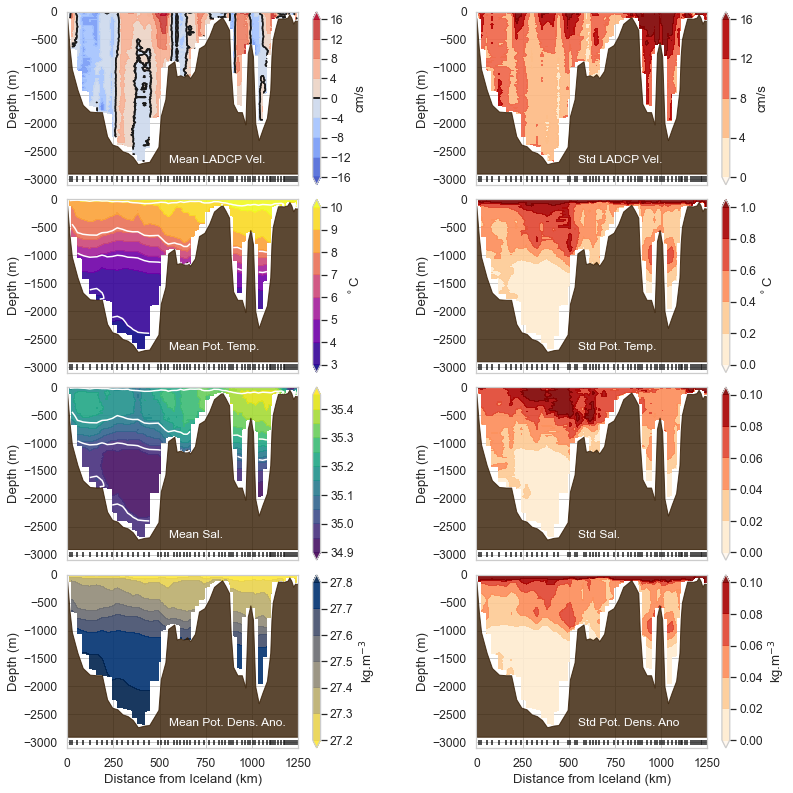

In [38]:
#plt.rcParams.update({'font.size': 10})
    
# Create the figure
## fig, axs = plt.subplots(4, 2, figsize=(12, 12), constrained_layout=True)
fig, axs = plt.subplots(4, 2, sharex=True, figsize=(11, 11))
for row in [0,1,2,3]:
    for col in [0,1]:

        VarDir = vartoplot[row][col]
        var = VarDir['Data'] 
        cf_levels = VarDir['cf_levels'] 
        colmap = getattr(plt.cm, VarDir['cmap'] )
#         if VarDir['cmap'] == 'cividis':
#             colmap = colmap[:-1,:]
        
        pltitle = VarDir['pltitle']
        plunits = VarDir['cbtitle']
        
        X=refdist3Dfield
        Y=var.index.values
        Z=var.values
        Xi,Yi = np.meshgrid(X, Y)

        ax = axs[row, col]

        CS = ax.contourf(Xi, -Yi, Z, cf_levels, alpha=0.9, cmap=colmap, extend='both');
        
        if 'c_levels' in VarDir:
            c_levels = VarDir['c_levels'] 
            CS2 = ax.contour(CS, levels=c_levels, colors='k')

        # Plot specific potential density contour on temperature and salinity field, 
        # indicating of different water masses
        c_WM = [27.20,27.50,27.70,27.85]
        
        if (row in [1,2]) & (col ==0):
            CS_WM = ax.contour(Xi, -Yi, sdf_MSigma0, levels=c_WM, colors='w' )
            # clab=ax.clabel(CS_WM, CS_WM.levels, fmt='%1.2f', inline=True, fontsize=10)
            
            
        ax.set_ylabel('Depth (m)')
        ax.set_xlim([0,1250]) 
        ax.set_ylim([-3100,0])    
        
        # ax.set_title(pltitle)
        ax.text(550, -2700, VarDir['Type']+' '+VarDir['Var'], fontsize=12, color ='white' )
            
        # Make a colorbar for the ContourSet returned by the contourf call.
        cbar = fig.colorbar(CS, ax=ax)
        cbar.ax.set_ylabel(plunits)
        #cbar.ax.set_ylabel('m/s')
                
        # Add the contour line levels to the colorbar
        if 'c_levels' in VarDir:        
            cbar.add_lines(CS2)

        # Add bathymetry (from the nominal depth of the reference EEL stations)
        ax.fill_between(dfs['Refdist'], -dfs['DepthSta'], -2900, color="#331a00", alpha=0.8)
        
        ax.vlines(dfs['Refdist'], -3050, -2950, colors='k')

        if row ==3:
            ax.set_xlabel('Distance from Iceland (km)')
            
plt.tight_layout(pad=0.5,w_pad=3)          

plt.savefig('figures/'+'02_figure4x2.pdf')       

### b. For and absolute geostrophic velocity, relative geostrophic velocity 

In [39]:
# Create 2nd list of dictionaries for variable to plot on the "diagnostic figure" comparing the mean and standard deviation from:
# 1) the mean LADCP velocity, 2) the geostrophic velocity relative to LoNM, 3) the absolute velocity (relative geostrophic velocity reference to depth-average LADCP)

vartoplot_diag=[
    # 1st List correspond to first row of the 3x2 plot (LADCP Velocity)
    [{'Var':'LADCP Vel.', 
      'Type':'Mean', 
      'Data':sdf_MVladcp*100, 
      'cf_levels':np.arange(-16, 20, 4),
      'c_levels':[0,0],
      'cmap':'coolwarm',
      'pltitle':'Mean LADCP Velocity',
      'cbtitle':'cm/s'}, 
     
     {'Var':'LADCP Vel.', 
      'Type':'Std', 
      'Data':sdf_SDVladcp*100,
      'cf_levels':np.arange(0, 18, 4),
      'cmap':'OrRd',
      'pltitle':'STD LADCP Velocity',
      'cbtitle':'cm/s'}
    ],

    # 2nd List correspond to 2nd row of the 3x2 plot (Relative Geostrophic Velocity)
    [{'Var':'Rel. Gvel.', 
      'Type':'Mean', 
      'Data':sdf_MVrel*100, 
      'cf_levels':np.arange(-16, 20, 4),
      'c_levels':[0,0],
      'cmap':'coolwarm',
      'pltitle':'Mean Relative Velocity',
      'cbtitle':'cm/s'}, 
     
     {'Var':'Abs. Gvel.', 
      'Type':'Std', 
      'Data':sdf_SDVrel*100,
      'cf_levels':np.arange(0, 18, 4),
      'cmap':'OrRd',
      'pltitle':'STD Relative Velocity',
      'cbtitle':'cm/s'}
    ],
    
    # 3rd List correspond to 3rd row of the 3x2 plot (Absolute Velocity)
    [{'Var':'Abs. Gvel.', 
      'Type':'Mean', 
      'Data':sdf_MVabs*100, 
      'cf_levels':np.arange(-16, 20, 4),
      'c_levels':[0,0],
      'cmap':'coolwarm',
      'pltitle':'Mean Absolute Velocity',
      'cbtitle':'cm/s'}, 
     
     {'Var':'Abs. Gvel.', 
      'Type':'Std', 
      'Data':sdf_SDVabs*100,
      'cf_levels':np.arange(0, 18, 4),
      'cmap':'OrRd',
      'pltitle':'STD Absolute Velocity',
      'cbtitle':'cm/s'}
    ],
]


Create figure for LADCP, relative geostrophic velocity and absolute geostrophic velocity

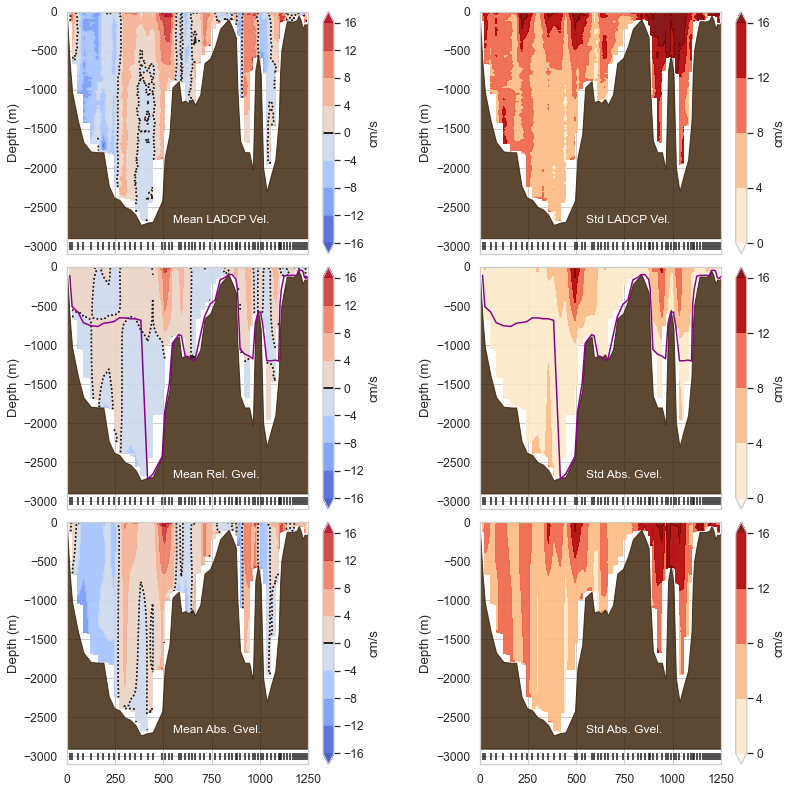

In [40]:
# Create Figure
fig, axs = plt.subplots(3,2, sharex=True, figsize=(11, 11))
for row in [0,1,2]:
    for col in [0,1]:

        VarDir = vartoplot_diag[row][col]
        var = VarDir['Data'] 
        cf_levels = VarDir['cf_levels'] 
        colmap = getattr(plt.cm, VarDir['cmap'] )
#         if VarDir['cmap'] == 'cividis':
#             colmap = colmap[:-1,:]
        
        pltitle = VarDir['pltitle']
        plunits = VarDir['cbtitle']
        
        X=refdist3Dfield
        Y=var.index.values
        Z=var.values
        Xi,Yi = np.meshgrid(X, Y)

        ax = axs[row, col]

        CS = ax.contourf(Xi, -Yi, Z, cf_levels, alpha=0.9, cmap=colmap, extend='both');
        
        if 'c_levels' in VarDir:
            c_levels = VarDir['c_levels'] 
            CS2 = ax.contour(CS, levels=c_levels, colors='k',linestyles='dotted')

        # Plot level of no motion on relative geostrophic velocity plot
        if row==1:
            CS_WM = ax.plot(df_MLoNMnew['Refdist'], -df_MLoNMnew['ZLoNM'], color='darkmagenta')

           
        ax.set_ylabel('Depth (m)')
        ax.set_xlim([0,1250]) 
        ax.set_ylim([-3100,0])    
        
        # ax.set_title(pltitle)
        ax.text(550, -2700, VarDir['Type']+' '+VarDir['Var'], fontsize=12, color ='white' )
            
        # Make a colorbar for the ContourSet returned by the contourf call.
        cbar = fig.colorbar(CS, ax=ax)
        cbar.ax.set_ylabel(plunits)
        #cbar.ax.set_ylabel('m/s')
                
        # Add the contour line levels to the colorbar
        if 'c_levels' in VarDir:        
            cbar.add_lines(CS2)

        # Add bathymetry (from the nominal depth of the reference EEL stations)
        ax.fill_between(dfs['Refdist'], -dfs['DepthSta'], -2900, color="#331a00", alpha=0.8)
        
        ax.vlines(dfs['Refdist'], -3050, -2950, colors='k')

        if row ==3:
            ax.set_xlabel('Distance from Iceland (km)')
            
plt.tight_layout(pad=0.5,w_pad=3)          
plt.savefig('figures/'+'02_figurediag3x2.pdf')       

Mean level of no motion used for Relative geostrophic velocity plot is displayed in purple